In [20]:
import wave
import numpy as np
import matplotlib.pyplot as plt

Wczytanie nagrania

In [3]:
female = wave.open('female.wav', 'rb')

Tyle próbek jest pobieranych w trakcie każdej sekundy

In [12]:
female_freq = female.getframerate()
female_freq

8000

Tyle próbek mamy łącznie

In [9]:
n_samples_female = female.getnframes()
n_samples_female

393348

Zatem nasze nagranie dla głosu żeńskiego trwa 49 s. 

In [11]:
t_audio_female = n_samples_female/female_freq
t_audio_female

49.1685

Mamy jeden kanał, więc nasz plik jest nagrany w mono. W przypadku gdybysmy otrzymali tutaj wartość 2 mielibyśmy do czynienia z plikiem nagranym w stereo.

In [8]:
n_channels_female = female.getnchannels()
n_channels_female

1

Odczytanie amplitudy dźwięku dla danej ilości próbek, w tym przypadku równej `n_samples_female`

In [14]:
signal_wave_female = female.readframes(n_samples_female)

Przeformatowanie z bytes do tablicy intów

In [16]:
signal_array_female = np.frombuffer(signal_wave_female, dtype=np.int16)

In [17]:
signal_array_female = np.array(signal_array_female, dtype=np.int32)

In [24]:
signal_array_female

array([138, -98, 158, ...,  41,  56,  50])

Zanim przejdziemy do wykreślania wartości sygnału, musimy obliczyć czas, w którym pobierana jest każda próbka. Jest to po prostu całkowita długość ścieżki w sekundach podzielona przez liczbę próbek. 

In [19]:
times = np.linspace(0, n_samples_female/female_freq, num=n_samples_female)
times

array([0.00000000e+00, 1.25000318e-04, 2.50000636e-04, ...,
       4.91682500e+01, 4.91683750e+01, 4.91685000e+01])

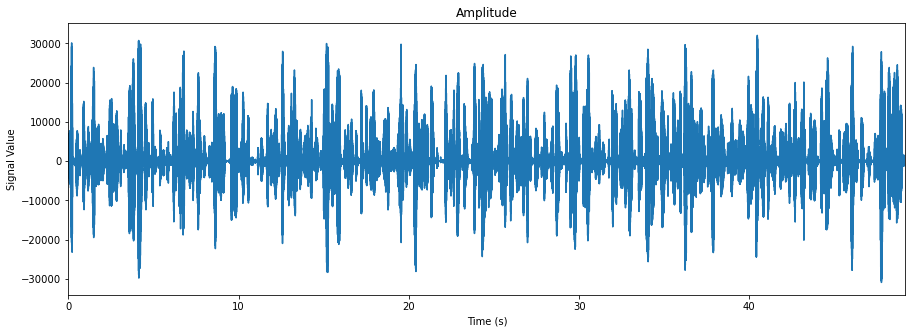

In [21]:
plt.figure(figsize=(15, 5))
plt.plot(times, signal_array_female)
plt.title('Amplitude')
plt.ylabel('Signal Value')
plt.xlabel('Time (s)')
plt.xlim(0, t_audio_female)
plt.show()

In [72]:
frame_size = int(female_freq * 0.02) #20 ms
hop_length = int(female_freq * 0.01) #10 ms

In [29]:
frames_amount = len(signal_array_female) // frame_size
frames_amount

2458.0

Podział na ramki, każda o długości 20 ms

In [31]:
 frames = np.array_split(signal_array_female, frames_amount)

### 1.1.Volume – głośność

In [123]:
def calculate_volumes(signal_array, frame_size, hop_length, freq):
    volumes = []
    for i in range(0, len(signal_array) - frame_size, hop_length):
        frame = signal_array[i:i+frame_size]
        volumes.append(np.sqrt(np.mean(frame**2)))
    max_val = np.max(np.abs(volumes))
    volumes = volumes / max_val
    times_frames = np.arange(0, len(volumes)) * hop_length / female_freq
    plt.figure(figsize=(15, 5))
    plt.plot(times_frames, volumes)
    plt.title('Volume per frame')
    plt.ylabel('Volume')
    plt.xlabel('Time (s)')
    plt.show()
    return volumes

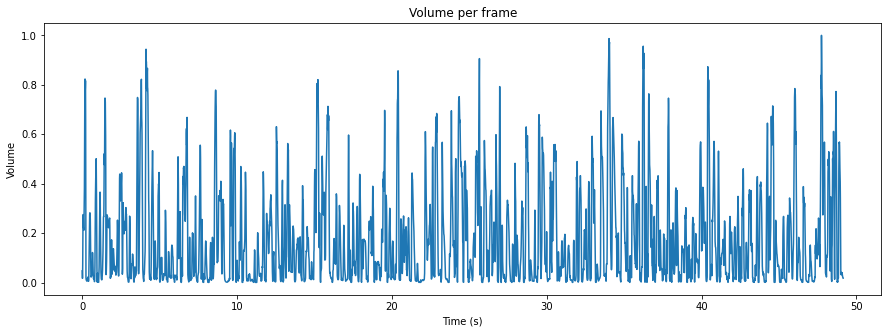

In [124]:
volumes = calculate_volumes(signal_array_female, frame_size, hop_length, female_freq)

### 1.2. STE (Short Time Energy)

In [125]:
def calculate_ste(signal_array, frame_size, hop_length, freq):
    ste = []
    for i in range(0, len(signal_array) - frame_size, hop_length):
        frame = signal_array[i:i+frame_size]
        ste.append(np.mean(frame**2))
    times_frames = np.arange(0, len(volumes)) * hop_length / female_freq
    plt.figure(figsize=(15, 5))
    plt.plot(times_frames, ste)
    plt.title('Short Time Energy (STE)')
    plt.ylabel('STE')
    plt.xlabel('Time (s)')
    plt.show()
    return ste

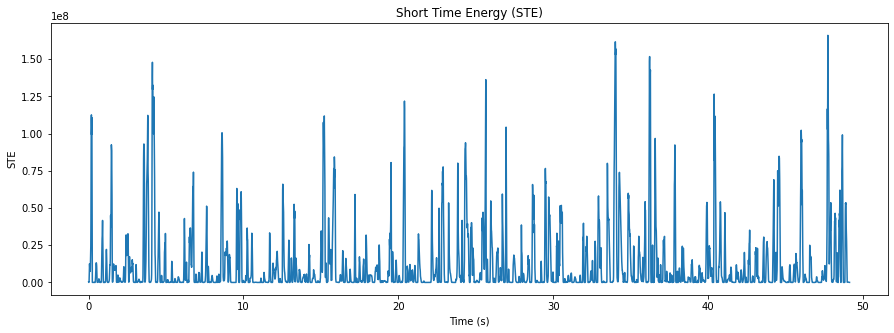

In [126]:
ste = calculate_ste(signal_array_female, frame_size, hop_length, female_freq)

### 1.3. ZCR – Zero Crossing Rate

In [127]:
def calculate_zcr(signal_array, frame_size, hop_length, freq):
    zcr = []
    for i in range(0, len(signal_array)-frame_size, hop_length):
        frame = signal_array[i:i+frame_size]
        zc = np.sum(np.abs(np.diff(np.sign(frame)))) / (2*frame_size)
        zcr.append(zc)
    times_frames = np.arange(0, len(zcr)) * hop_length / female_freq
    plt.figure(figsize=(15, 5))
    plt.plot(times_frames, zcr)
    plt.xlabel('Time (s)')
    plt.ylabel('ZCR')
    plt.show()
    return zcr

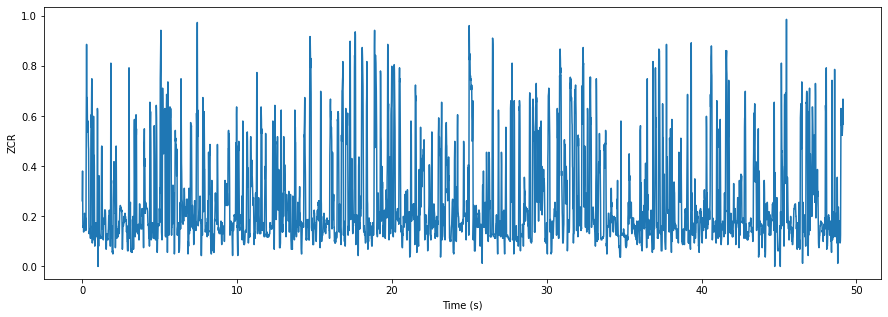

In [128]:
zcr = calculate_zcr(signal_array_female, frame_size, hop_length, female_freq)

### 1.4. SR – Silent Ratio

In [129]:
zcr

[0.2625,
 0.325,
 0.38125,
 0.25625,
 0.15625,
 0.1625,
 0.1625,
 0.15625,
 0.15625,
 0.1375,
 0.15625,
 0.1625,
 0.14375,
 0.15625,
 0.1875,
 0.2125,
 0.20625,
 0.2,
 0.19375,
 0.2,
 0.19375,
 0.19375,
 0.16875,
 0.14375,
 0.14375,
 0.30625,
 0.575,
 0.8,
 0.8875,
 0.75625,
 0.575,
 0.59375,
 0.675,
 0.56875,
 0.5375,
 0.5625,
 0.55625,
 0.58125,
 0.54375,
 0.51875,
 0.48125,
 0.46875,
 0.3625,
 0.175,
 0.13125,
 0.1375,
 0.1375,
 0.1375,
 0.14375,
 0.15,
 0.15,
 0.15,
 0.13125,
 0.1125,
 0.1625,
 0.375,
 0.525,
 0.575,
 0.60625,
 0.55625,
 0.65625,
 0.7125,
 0.75,
 0.70625,
 0.33125,
 0.09375,
 0.125,
 0.1625,
 0.15,
 0.11875,
 0.10625,
 0.18125,
 0.41875,
 0.6,
 0.49375,
 0.36875,
 0.3625,
 0.44375,
 0.4,
 0.2,
 0.1,
 0.08125,
 0.11875,
 0.125,
 0.1125,
 0.1125,
 0.11875,
 0.15,
 0.175,
 0.16875,
 0.16875,
 0.16875,
 0.1625,
 0.16875,
 0.1625,
 0.11875,
 0.15,
 0.33125,
 0.63125,
 0.61875,
 0.31875,
 0.1,
 0.0,
 0.08125,
 0.18125,
 0.1375,
 0.08125,
 0.16875,
 0.3625,
 0.325,
 0.143

In [130]:
volumes

array([0.04722962, 0.01724238, 0.01698377, ..., 0.02121929, 0.02043845,
       0.01759644])

In [131]:
def silent_ratio(zcr, volume, hop_length, freq, treshold):
    silence_threshold = treshold

    # Calculate total duration of audio
    total_duration = len(zcr) * hop_length / female_freq

    # Calculate total duration of silence
    total_silence_duration = 0
    for i in range(len(zcr)):
        if zcr[i] < silence_threshold and volumes[i] < silence_threshold:
            total_silence_duration += hop_length / female_freq

    # Calculate silent ratio
    silent_ratio = total_silence_duration / total_duration

    print(f"Silent ratio: {silent_ratio:.2f}")
    return silent_ratio

In [133]:
silent_ratio(zcr, volumes, hop_length, female_freq, 0.01)

Silent ratio: 0.00


0.0006103763987792472